In [ ]:
import json
import re

In [ ]:
f = open('/content/CMeEE_train.json')


In [ ]:
data = json.load(f)


In [ ]:
depF = open('./dep.json')
depDataset = json.load(depF)

In [ ]:
equF = open('./equ.json')
equDataset = json.load(equF)

In [ ]:
iteF = open('./ite.json')
iteDataset = json.load(iteF)

In [ ]:
data = depDataset + equDataset + data + iteDataset

In [ ]:
s = open('/content/CMID_datasets.json')


In [ ]:
data_cmid = json.load(s)

In [ ]:
data_cmid

In [ ]:
unique_ent_cmid = []
for chunk in data_cmid:
  for entity in chunk['entities']:
    if entity['label_type'] not in unique_ent_cmid:
      unique_ent_cmid.append(entity['label_type'])

In [ ]:
unique_ent_cmid

['疾病和诊断', '解剖部位', '药物', '影像检查', '手术', '实验室检验']

In [ ]:
unique_ent_cmeee = []
for chunk in data:
  for entity in chunk['entities']:
    if entity['type'] not in unique_ent_cmeee:
      unique_ent_cmeee.append(entity['type'])

In [ ]:
unique_ent_cmeee

['dep', 'equ', 'pro', 'dis', 'sym', 'ite', 'bod', 'dru', 'mic']

In [ ]:
ent_type_replacement = {
    '解剖部位':'bod',
    '疾病和诊断' : 'dis',
    '药物' : 'dru',
    '手术' : 'pro'
}

In [ ]:
new_dataset2 = []

for data2 in data_cmid:
    text = data2['originalText']
    entities = []

    if data2['entities']:
      for entity in data2['entities']:
        start_idx = entity['start_pos']
        end_idx = entity['end_pos'] - 1
        label_type = entity['label_type']

        if label_type in ent_type_replacement:
            entities.append({
                'start_idx': start_idx,
                'end_idx': end_idx,
                'type': ent_type_replacement[label_type],
                'entity': text[start_idx:end_idx]
            })

      if entities:
        new_data2 = {
            'text': data2['originalText'],
            'entities': entities
        }

        new_dataset2.append(new_data2)

concatenated_dataset = data + new_dataset2

In [ ]:
concatenated_dataset

In [ ]:
# Save JSON data to a file
with open('data.json', 'w') as json_file:
    json.dump(data, json_file, ensure_ascii=False)

In [ ]:
json_file

<_io.TextIOWrapper name='data.json' mode='w' encoding='UTF-8'>

In [ ]:
from collections import defaultdict

In [ ]:
entities_count = defaultdict(int)

for chunk in concatenated_dataset:
  for entity in chunk['entities']:
    entities_count[entity['type']]+=1

In [ ]:
entities_count

defaultdict(int,
            {'dep': 4818,
             'equ': 4503,
             'pro': 6387,
             'dis': 19411,
             'sym': 12269,
             'ite': 5389,
             'bod': 22569,
             'dru': 6259,
             'mic': 1908})

In [ ]:
import matplotlib.pyplot as plt

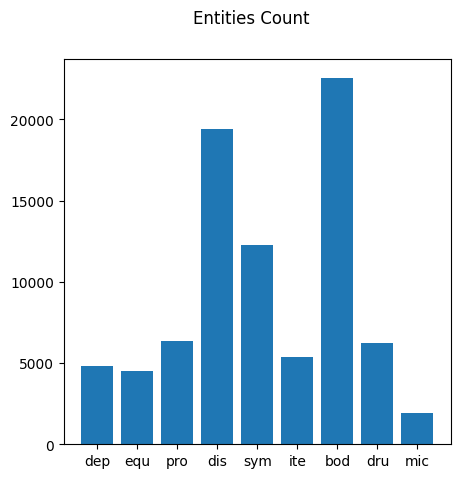

In [ ]:
names = entities_count.keys()
values = entities_count.values()

plt.figure(figsize=(5, 5))
plt.bar(names, values)
plt.suptitle('Entities Count')
plt.show()